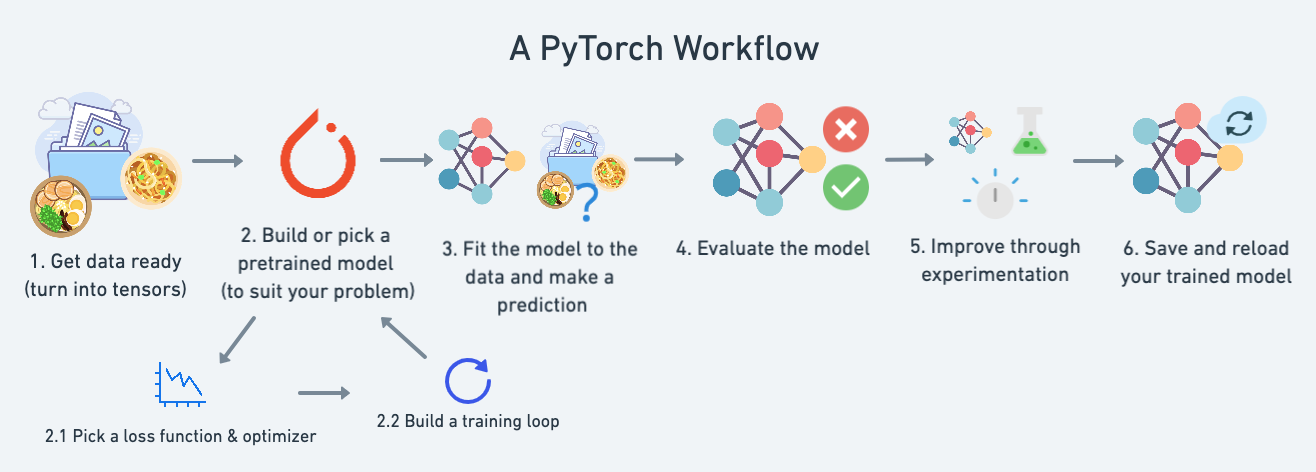

In [1]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.0'

## Data preparation

It can be:
- table
- image
- video
- audio
- text
- DNA
- ...

## Linear Regression

### Create dataset

In [2]:
# create known parameters
weight = 0.7
bias = 0.3

In [3]:
# create formula
start = 0
end = 1
step = 0.02

In [4]:
X = torch.arange(start, end, step).unsqueeze(1)
y = weight * X + bias

In [5]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [6]:
X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

### Split data into train and test sets

In [7]:
train_size = int(0.8 * len(X))
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

X_train.shape, y_train.shape

(torch.Size([40, 1]), torch.Size([40, 1]))

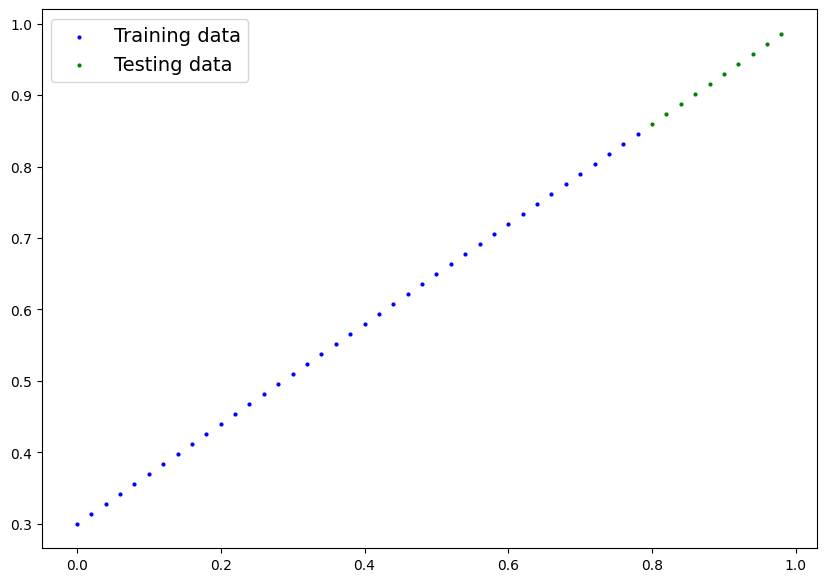

In [8]:
def plot_predictions(train_data=X_train,
                     train_label=y_train,
                     test_data=X_test,
                     test_label=y_test,
                     predictions=None
                    ):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_label, c='b', s=4, label='Training data')
    plt.scatter(test_data, test_label, c='g', s=4, label='Testing data')
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')
    plt.legend(prop={'size': 14})
plot_predictions()

### Build model

In [9]:
class LinearRegression(nn.Module):  # `nn.Module` : Base class for all neural network modules
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    # defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias  # the linear regression formula

In [10]:
# create a random seed
torch.manual_seed(42)

# define the model
model = LinearRegression()

In [11]:
model._parameters

OrderedDict([('weights',
              Parameter containing:
              tensor([0.3367], requires_grad=True)),
             ('bias',
              Parameter containing:
              tensor([0.1288], requires_grad=True))])

In [12]:
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [13]:
weight, bias

(0.7, 0.3)

In [14]:
# trying to make prediction with untrained model
with torch.inference_mode():  # disable some training features to make prediction more efficient
    y_preds = model(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

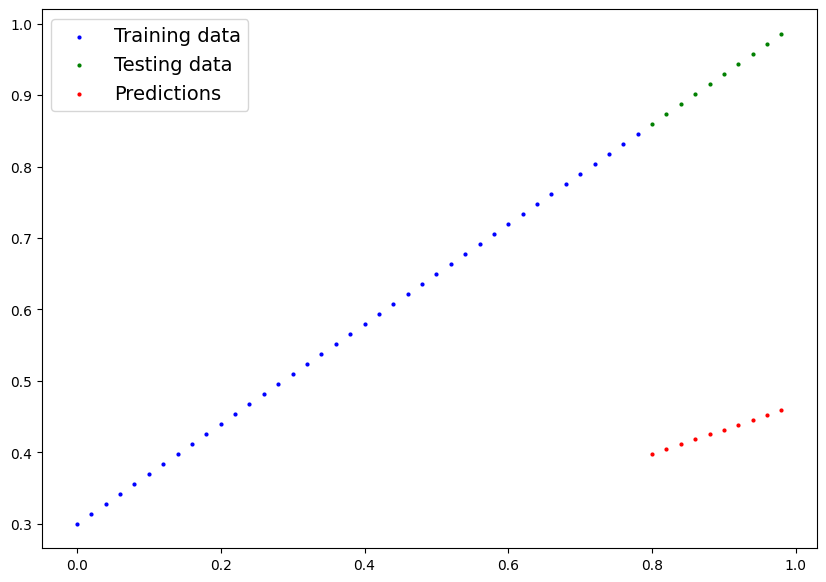

In [15]:
plot_predictions(predictions=y_preds)

### Training model

In [16]:
# loss function
criterion = nn.L1Loss()

# optimizer
learning_rate = 0.001
optimizer =  torch.optim.SGD(model.parameters(), lr=learning_rate)  # learning rate : possibly most important hyperparameter

> Which loss function and optimizer to use depend on the problem specific and experience.
> 
> Ex:
> - For regression problem, loss function like `L1Loss (MAE)` and optimizer like `SGD` will suffice
> - But for classification problem, you will want to use a loss function like `BCELoss (binary cross entropy)`

#### Training loop
1. Loop through the data (set epochs)
2. Forward propagation (feed forward)
3. Calculate the loss
4. Optimizer zero grad (clear out the gradients at each iteration of training)
5. Loss backward (backpropagation)
6. Optimizer step (perform gradient descent)

In [17]:
# Training loop
epochs = 2000

epoch_count = []
train_loss = []
test_loss = []

# model.train()  # training mode

for epoch in range(epochs):  # 1.
    y_pred = model(X_train)  # 2.
    loss = criterion(y_pred, y_train) # 3.
    optimizer.zero_grad() # 4.
    loss.backward() # 5.
    optimizer.step() # 6.

    # tracking the training process
    if (epoch+1) % 100 == 0:
        with torch.inference_mode():  # no-grad
            y_pred = model(X_test)
            y_loss = criterion(y_pred, y_test)

            epoch_count.append(epoch+1)
            train_loss.append(loss.detach().numpy())
            test_loss.append(y_loss.detach().numpy())
        print(f'Epoch: {epoch+1} | Train_loss: {loss:.5f} | Test_loss: {y_loss:.5f}')

# model.eval()  # evaluation mode

Epoch: 100 | Train_loss: 0.19882 | Test_loss: 0.35983
Epoch: 200 | Train_loss: 0.09044 | Test_loss: 0.22905
Epoch: 300 | Train_loss: 0.05372 | Test_loss: 0.15137
Epoch: 400 | Train_loss: 0.04554 | Test_loss: 0.11682
Epoch: 500 | Train_loss: 0.04164 | Test_loss: 0.10099
Epoch: 600 | Train_loss: 0.03815 | Test_loss: 0.08997
Epoch: 700 | Train_loss: 0.03470 | Test_loss: 0.08108
Epoch: 800 | Train_loss: 0.03126 | Test_loss: 0.07302
Epoch: 900 | Train_loss: 0.02783 | Test_loss: 0.06502
Epoch: 1000 | Train_loss: 0.02439 | Test_loss: 0.05695
Epoch: 1100 | Train_loss: 0.02096 | Test_loss: 0.04895
Epoch: 1200 | Train_loss: 0.01752 | Test_loss: 0.04088
Epoch: 1300 | Train_loss: 0.01409 | Test_loss: 0.03288
Epoch: 1400 | Train_loss: 0.01066 | Test_loss: 0.02482
Epoch: 1500 | Train_loss: 0.00722 | Test_loss: 0.01682
Epoch: 1600 | Train_loss: 0.00379 | Test_loss: 0.00878
Epoch: 1700 | Train_loss: 0.00035 | Test_loss: 0.00075
Epoch: 1800 | Train_loss: 0.00071 | Test_loss: 0.00077
Epoch: 1900 | Train

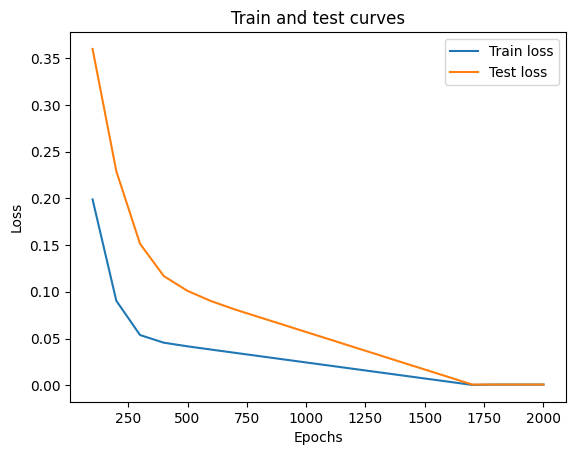

In [18]:
plt.plot(epoch_count, train_loss, label='Train loss')
plt.plot(epoch_count, test_loss, label='Test loss')
plt.title("Train and test curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [19]:
model.state_dict()

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])

In [20]:
optimizer.state_dict()

{'state': {0: {'momentum_buffer': None}, 1: {'momentum_buffer': None}},
 'param_groups': [{'lr': 0.001,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False,
   'params': [0, 1]}]}

### Save and Load model

In [21]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_LinearRegression_2000.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/01_LinearRegression_2000.pth')

In [22]:
# Saving model state_dict for Inference
torch.save(model.state_dict(), MODEL_SAVE_PATH)

In [23]:
loaded_model = torch.load(MODEL_SAVE_PATH)

In [24]:
model = LinearRegression()
model.state_dict()

OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])

In [25]:
model.load_state_dict(loaded_model)

<All keys matched successfully>

In [26]:
model.state_dict()

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])

### Linear Regression build-in model

In [27]:
class LinearRegressionV2(nn.Module):
    def __init__(self):
        super(LinearRegressionV2, self).__init__()
        self.linear = nn.Linear(in_features=1, out_features=1)
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [28]:
torch.manual_seed(42)

model_V2 = LinearRegressionV2()
model_V2.state_dict()

OrderedDict([('linear.weight', tensor([[0.7645]])),
             ('linear.bias', tensor([0.8300]))])

In [29]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [30]:
next(model_V2.parameters()).device

device(type='cpu')

In [31]:
model_V2.to(device=device)
next(model_V2.parameters()).device

device(type='cuda', index=0)

In [32]:
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [33]:
criterion = nn.L1Loss()

learning_rate = 0.001
optimizer = torch.optim.SGD(model_V2.parameters(), learning_rate)

In [34]:
torch.manual_seed(42)

epochs = 2000

for epoch in range(epochs):
    model_V2.train()
    outputs = model_V2(X_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        model_V2.eval()
        test_pred = model_V2(X_test)
        test_loss = criterion(test_pred, y_test)
        print(f"Epoch: {epoch+1}, Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 100, Train loss: 0.44112, Test loss: 0.45274
Epoch: 200, Train loss: 0.32591, Test loss: 0.31803
Epoch: 300, Train loss: 0.21070, Test loss: 0.18332
Epoch: 400, Train loss: 0.09550, Test loss: 0.04861
Epoch: 500, Train loss: 0.02423, Test loss: 0.04439
Epoch: 600, Train loss: 0.01993, Test loss: 0.04605
Epoch: 700, Train loss: 0.01648, Test loss: 0.03847
Epoch: 800, Train loss: 0.01305, Test loss: 0.03047
Epoch: 900, Train loss: 0.00961, Test loss: 0.02240
Epoch: 1000, Train loss: 0.00618, Test loss: 0.01440
Epoch: 1100, Train loss: 0.00274, Test loss: 0.00637
Epoch: 1200, Train loss: 0.00038, Test loss: 0.00073
Epoch: 1300, Train loss: 0.00038, Test loss: 0.00073
Epoch: 1400, Train loss: 0.00038, Test loss: 0.00073
Epoch: 1500, Train loss: 0.00038, Test loss: 0.00073
Epoch: 1600, Train loss: 0.00038, Test loss: 0.00073
Epoch: 1700, Train loss: 0.00038, Test loss: 0.00073
Epoch: 1800, Train loss: 0.00038, Test loss: 0.00073
Epoch: 1900, Train loss: 0.00038, Test loss: 0.00073
Ep

In [35]:
model_V2.state_dict()

OrderedDict([('linear.weight', tensor([[0.6999]], device='cuda:0')),
             ('linear.bias', tensor([0.3008], device='cuda:0'))])

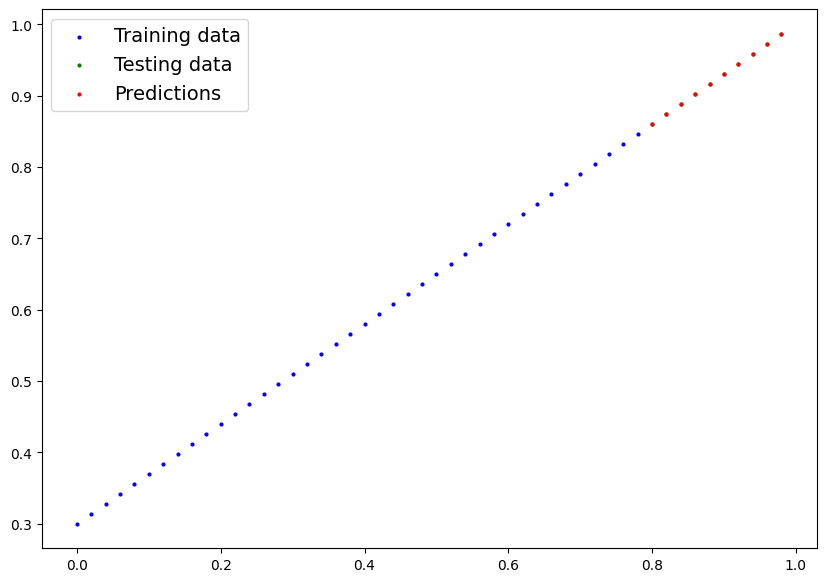

In [36]:
model_V2.eval()
with torch.inference_mode():
    y_pred = model_V2(X_test)
plot_predictions(predictions=y_pred.cpu())

In [37]:
MODEL_NAME = '02_LinearRegression_2000.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(model_V2.state_dict(), MODEL_SAVE_PATH)

loaded_model = LinearRegressionV2()
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [38]:
loaded_model

LinearRegressionV2(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [39]:
loaded_model.state_dict()

OrderedDict([('linear.weight', tensor([[0.6999]])),
             ('linear.bias', tensor([0.3008]))])

In [40]:
next(loaded_model.parameters()).device

device(type='cpu')

In [41]:
loaded_model.to(device)

LinearRegressionV2(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)